<center><h1>Analisis Anilistico Del Vientos Fenicios 🌪🌫</h1></center>
<h2>Integrantes:</h2>
<h5>Freddy Jaimes</h5>
<h5>Juan Vargas</h5>
<h5>Angel de Leon</h5>
<center><img src="img/Freddy.png" width="300px"></center>
<center><img src="img/Juan.png" width="300px"></center>
<center><img src="img/Leon.png" width="300px"></center>


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

RESULTADOS_DIR = "Resultados"



def leer_modelo(ruta):
    modelo = pd.read_csv(ruta, sep="\s+", skiprows=3,
                         usecols=["YYYYMMDD", "HHMM", "M(m/s)", "D(deg)"],
                         parse_dates={"MarcaTemporal": [0, 1]}, index_col="MarcaTemporal")
    modelo.rename(columns={"M(m/s)": "Velocidad(m/s)",
                           "D(deg)": "Direccion(deg)"},
                  inplace=True)
    return modelo


<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ElAdagioDeJP\AppData\Local\Temp\ipykernel_10812\3420026395.py:10: SyntaxWarning: invalid escape sequence '\s'
  modelo = pd.read_csv(ruta, sep="\s+", skiprows=3,


<center><img src="img/credits.png" width="300px"></center>

<center><h2>Matriz de figuras de dispersión de los primeros 1000 registros</h2></center>

C:\Users\ElAdagioDeJP\AppData\Local\Temp\ipykernel_10812\3420026395.py:10: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  modelo = pd.read_csv(ruta, sep="\s+", skiprows=3,


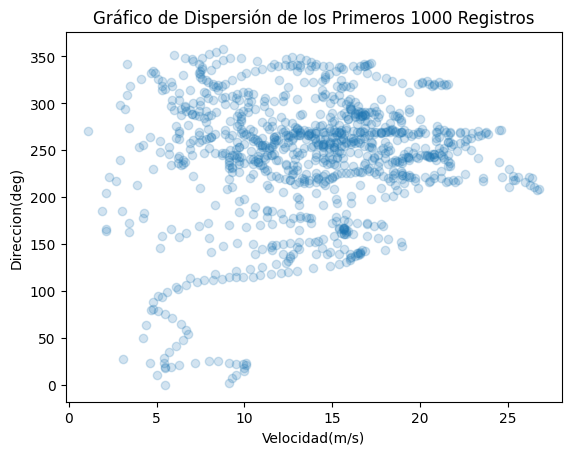

In [6]:
def graficar_dispersion_primeros_1000(modelo):
    # Seleccionar las primeras 1000 filas para "Velocidad(m/s)" y "Direccion(deg)"
    subconjunto = modelo.iloc[:1000]
    velocidad = subconjunto["Velocidad(m/s)"]
    direccion = subconjunto["Direccion(deg)"]
    
    # Crear un gráfico de dispersión
    plt.scatter(velocidad, direccion, alpha=0.2)
    plt.xlabel("Velocidad(m/s)")
    plt.ylabel("Direccion(deg)")
    plt.title("Gráfico de Dispersión de los Primeros 1000 Registros")
    plt.show()

modelo = leer_modelo("C:/Users/ElAdagioDeJP/Documents/GitHub/Proyectos_Calculo_Numerico_Grupal/Analisis_De_Datos_Eval_4/model.txt")

graficar_dispersion_primeros_1000(modelo)

<center><h2>Matriz de figuras de dispersión de los primeros 1000 registros con mayor velocidad de viento</h2></center>

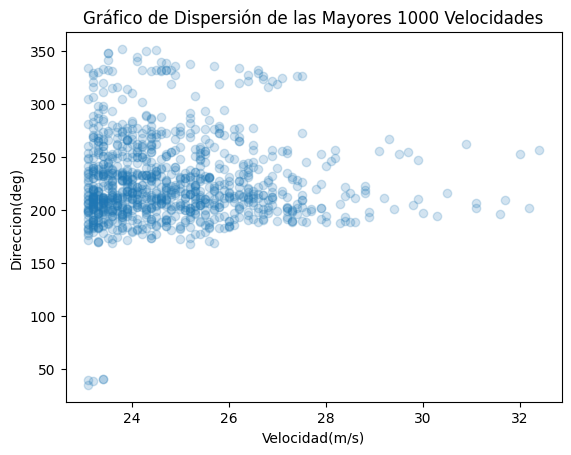

In [8]:
def graficar_dispersion_mayor_velocidad_1000(modelo):
    # Seleccionar las 1000 filas con mayor "Velocidad(m/s)"
    mayores_velocidades = modelo.nlargest(1000, "Velocidad(m/s)")
    
    # Suponiendo que "Direccion(deg)" es la columna a graficar contra "Velocidad(m/s)"
    plt.scatter(mayores_velocidades["Velocidad(m/s)"], mayores_velocidades["Direccion(deg)"], alpha=0.2)
    plt.xlabel("Velocidad(m/s)")
    plt.ylabel("Direccion(deg)")
    plt.title("Gráfico de Dispersión de las Mayores 1000 Velocidades")
    plt.show()

graficar_dispersion_mayor_velocidad_1000(modelo)

<center><img src="img/vientos.png" width="300px"></center>

<center><h2>Histograma de la velocidad del viento con 36 particiones</h2></center>

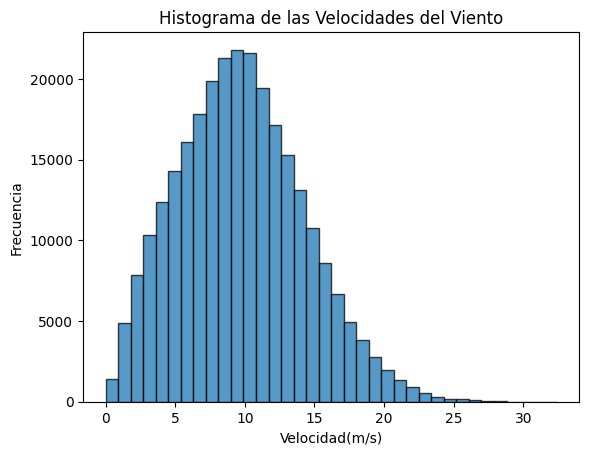

In [9]:
def graficar_histograma_velocidad(modelo):
    # Graficar el histograma con 36 particiones
    plt.hist(modelo["Velocidad(m/s)"], bins=36, alpha=0.75, edgecolor='black')
    
    # Añadir etiquetas y título
    plt.xlabel("Velocidad(m/s)")
    plt.ylabel("Frecuencia")
    plt.title("Histograma de las Velocidades del Viento")
    
    # Mostrar el gráfico
    plt.show()

graficar_histograma_velocidad(modelo)

<center><img src="img/ricardo.gif" width="300px"></center>

<center><h2>Histórico mensual de la velocidad media del viento</h2></center>

Año   Mes
1984  1      13.821505
      2      10.043534
      3       8.708199
      4       7.939583
      5       8.283871
               ...    
2015  5       9.739382
      6       9.018056
      7       9.500134
      8       8.748522
      9       8.111250
Name: Velocidad(m/s), Length: 381, dtype: float64



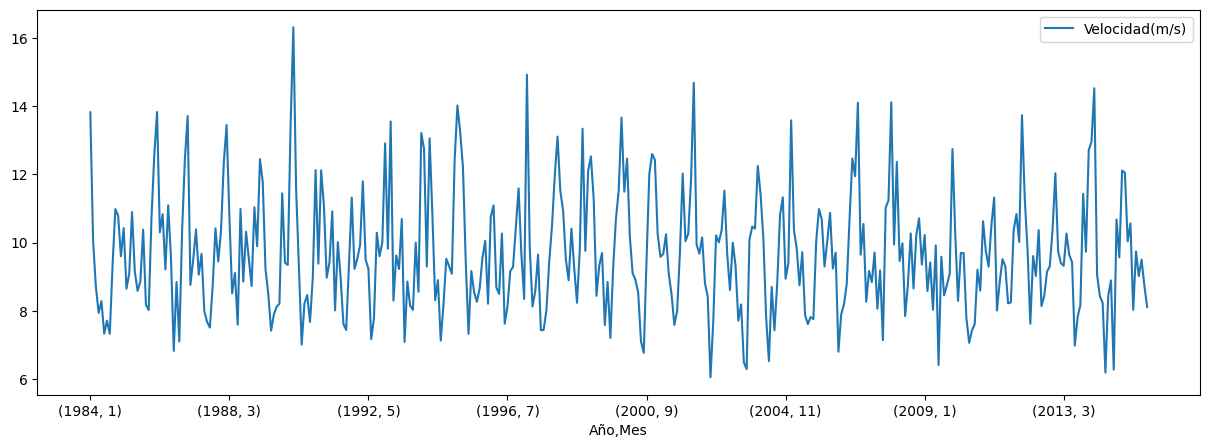

Año   Mes
1984  1      13.821505
      2      10.043534
      3       8.708199
      4       7.939583
      5       8.283871
               ...    
2015  5       9.739382
      6       9.018056
      7       9.500134
      8       8.748522
      9       8.111250
Name: Velocidad(m/s), Length: 381, dtype: float64

In [10]:
def velocidad_media_mensual(modelo):
    mensual = modelo["Velocidad(m/s)"].groupby([modelo.index.year,
                                                modelo.index.month]).mean()
    mensual.rename_axis(index=["Año", "Mes"], inplace=True)
    print(mensual, end="\n\n")
    
    mensual.plot(legend=True, figsize=(15, 5))
    plt.show()
    return mensual
velocidad_media_mensual(modelo)

<center><img src="img/Cardio.jpeg" width="300px"></center>

C:\Users\ElAdagioDeJP\AppData\Local\Temp\ipykernel_10812\3268464142.py:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  model = pd.read_csv("C:/Users/ElAdagioDeJP/Documents/GitHub/Calculo-Grupal/Proyectos/Pandas/model.txt", delim_whitespace=True, skiprows = 3,parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')
C:\Users\ElAdagioDeJP\AppData\Local\Temp\ipykernel_10812\3268464142.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  model = pd.read_csv("C:/Users/ElAdagioDeJP/Documents/GitHub/Calculo-Grupal/Proyectos/Pandas/model.txt", delim_whitespace=True, skiprows = 3,parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')


               M(m/s)      D(deg)       T(C)  De(k/m3)     PRE(hPa)  \
year month                                                            
1984 1      13.821505  233.603495   4.621505  1.247419   993.974328   
     2      10.043534  164.089080   3.522701  1.269368  1007.659339   
     3       8.708199  153.081989   4.138306  1.261425  1003.437231   
     4       7.939583  162.113889   6.781111  1.255986  1008.487083   
     5       8.283871  123.590054   8.034677  1.238763   998.939113   
...               ...         ...        ...       ...          ...   
2015 5       9.739382  198.940860  10.332930  1.233306  1002.844355   
     6       9.018056  184.073611  13.198056  1.226583  1007.699722   
     7       9.500134  213.376344  15.979435  1.208266  1002.097043   
     8       8.748522  178.634409  16.672849  1.205793  1002.613978   
     9       8.111250  228.179167  13.572500  1.226750  1008.782500   

             RiNumber      RH(%)  
year month                        
1984 1

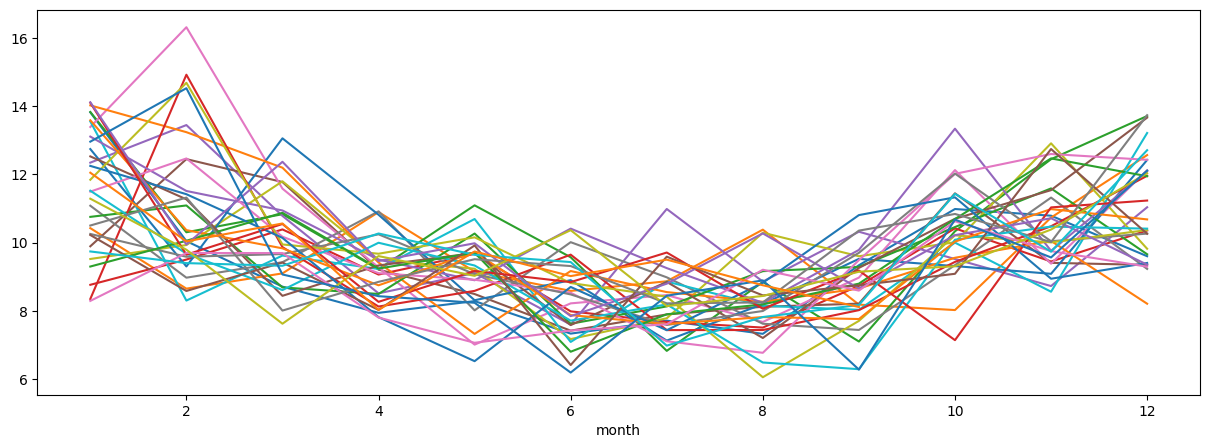

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#Asignando el model y filtrando las primeras lineas
model = pd.read_csv("C:/Users/ElAdagioDeJP/Documents/GitHub/Calculo-Grupal/Proyectos/Pandas/model.txt", delim_whitespace=True, skiprows = 3,parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')

model['month'] = model.index.month
model['year'] = model.index.year

monthly = model.groupby(by=['year', 'month']).mean()

#Imprimiendolo
monthly.loc[:, 'M(m/s)'].reset_index().pivot(index='year', columns='month')
print(monthly)

#Graficando
monthly.loc[:, 'M(m/s)'].reset_index().pivot(index='year', columns='month').T.loc['M(m/s)'].plot(figsize=(15, 5), legend=False)
plt.show()

C:\Users\ElAdagioDeJP\AppData\Local\Temp\ipykernel_10812\4191203521.py:6: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  model = pd.read_csv("C:/Users/ElAdagioDeJP/Documents/GitHub/Calculo-Grupal/Proyectos/Pandas/model.txt", delim_whitespace=True, skiprows = 3,parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')
C:\Users\ElAdagioDeJP\AppData\Local\Temp\ipykernel_10812\4191203521.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  model = pd.read_csv("C:/Users/ElAdagioDeJP/Documents/GitHub/Calculo-Grupal/Proyectos/Pandas/model.txt", delim_whitespace=True, skiprows = 3,parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')


               M(m/s)      D(deg)       T(C)  De(k/m3)     PRE(hPa)  \
year month                                                            
1984 1      13.821505  233.603495   4.621505  1.247419   993.974328   
     2      10.043534  164.089080   3.522701  1.269368  1007.659339   
     3       8.708199  153.081989   4.138306  1.261425  1003.437231   
     4       7.939583  162.113889   6.781111  1.255986  1008.487083   
     5       8.283871  123.590054   8.034677  1.238763   998.939113   
...               ...         ...        ...       ...          ...   
2015 5       9.739382  198.940860  10.332930  1.233306  1002.844355   
     6       9.018056  184.073611  13.198056  1.226583  1007.699722   
     7       9.500134  213.376344  15.979435  1.208266  1002.097043   
     8       8.748522  178.634409  16.672849  1.205793  1002.613978   
     9       8.111250  228.179167  13.572500  1.226750  1008.782500   

             RiNumber      RH(%)        ma  
year month                     

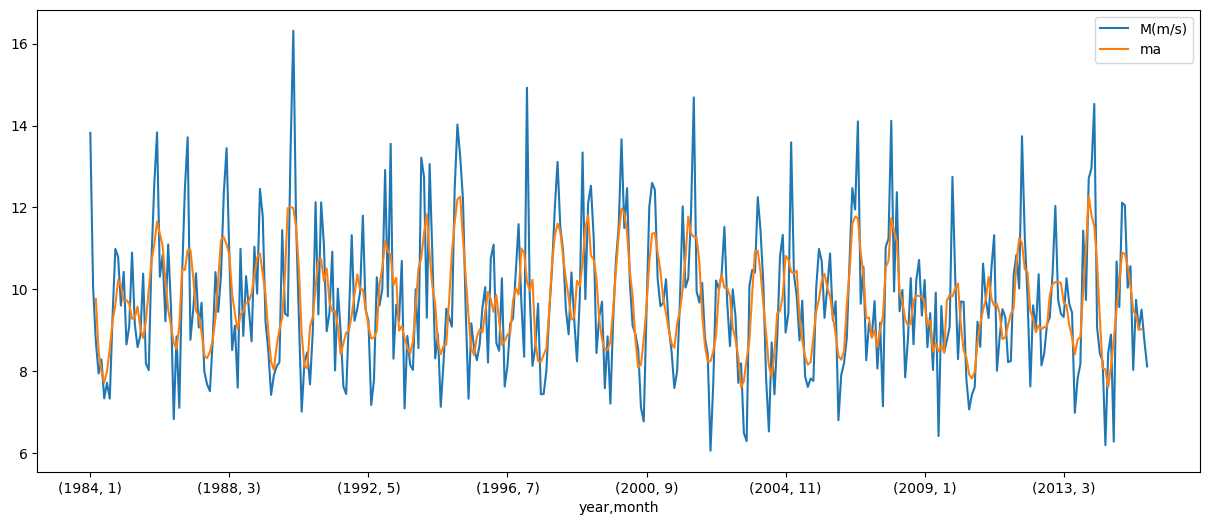

In [8]:
#Importando Librerias Necesarias
import pandas as pd
import matplotlib.pyplot as plt

#Asignando el model y filtrando las primeras lineas
model = pd.read_csv("C:/Users/ElAdagioDeJP/Documents/GitHub/Calculo-Grupal/Proyectos/Pandas/model.txt", delim_whitespace=True, skiprows = 3,parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')

model['month'] = model.index.month
model['year'] = model.index.year

monthly = model.groupby(by=['year', 'month']).mean()
monthly['ma'] = monthly.loc[:, 'M(m/s)'].rolling(5, center=True).mean()
print(monthly)

monthly.loc[:, ['M(m/s)', 'ma']].plot(figsize=(15, 6))
plt.show()

<center><img src="img/descargar.png" width="300px"></center>